# **Project Name**    - Netflix Movies And TV Show Clusteing.




##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member  -** Ayush Dattatray Bhagat



# **Project Summary -**

netflix.png

Netflix, the world’s largest on-demand internet streaming media and online DVD movie rental service provider.it Founded August 29, 1997, in Los Gatos, California by Marc and Reed. It has 69 million members in over 60 countries enjoying more than 100 million hours of TV shows and movies per day Netflix is the world’s leading internet entertainment service with enjoying TV series, documentaries, and feature films across a wide variety of genres and languages. I was curious to analyze the content released in Netflix platform which led me to create these simple, interactive, and exciting visualizations and find similar groups of people.

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine. In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

In this project, we worked on a text clustering problem where we had to classify/group the Netflix movie/shows into certain clusters such that the shows within a cluster are similar to each other and the shows in different clusters are dissimilar to each other.

The dataset contained about 7787 records, and 12 attributes.

In the initial phase, we have focused more on the data cleaning and analyzed data in various categories and then we did exploratory data analysis (EDA).

We Created cluster using following attributes like director, cast, country, genre, rating and description. These attributes were tokenized, preprocessed, and then vectorized using TFIDF vectorizer.

We used Principal Component Analysis (PCA) to handle the curse of dimensionality.

We built Two types of clusters using the K-Means Clustering and Agglomerative Hierarchical clustering algorithm and find out optimal number of clusters using diffrent technique such as elbow method, silhoutte score and dendogram etc.

A content based recommender system was built using the similarity matrix obtained after using cosine similarity. This recommender system will make 10 recommendations to the user based on the type of show they watched.

# **GitHub Link -**

https://github.com/Ayushx29/Netflix-Movie-And-TV-Show-Clustering

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019.The dataset is collected from Flixable which is a third-party Netflix search engine.

 In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010.
  The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

# In This Poject You Are Required To Do:


*   Exploratory Data Analysis

*  Understanding what type content is available in different countries

* If Netflix has been increasingly focusing on TV rather than movies in recent
  years.
* Clustering similar content by matching text-based features




# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
from numpy import math
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.ticker as mtick
from matplotlib.pyplot import figure
import plotly.graph_objects as go
import plotly.offline as py
import plotly.express as px

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
filepath = "/content/drive/MyDrive/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"

In [ ]:
df = pd.read_csv(filepath)

### Dataset First View

In [ ]:
# Dataset First Look
df.head(10)

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

In [ ]:
df.columns

### Dataset Information

In [ ]:
# Dataset Info
df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isnull().sum()

In [ ]:
df.isnull().sum().sum()

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(5,4))
sns.heatmap(df.isnull(),cbar=True, yticklabels=False,cmap='Reds')
plt.xlabel("column_name", size=14)
plt.title("missing values in column",weight="bold",size=17)
plt.show()

In [ ]:
df[['director','cast','country']] = df[['director','cast','country']].fillna('Unknown')
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df.dropna(axis=0, inplace = True)

In [ ]:
df.shape

In [ ]:
df.isnull().sum()

Here we have handeled the missing values.

### What did you know about your dataset?

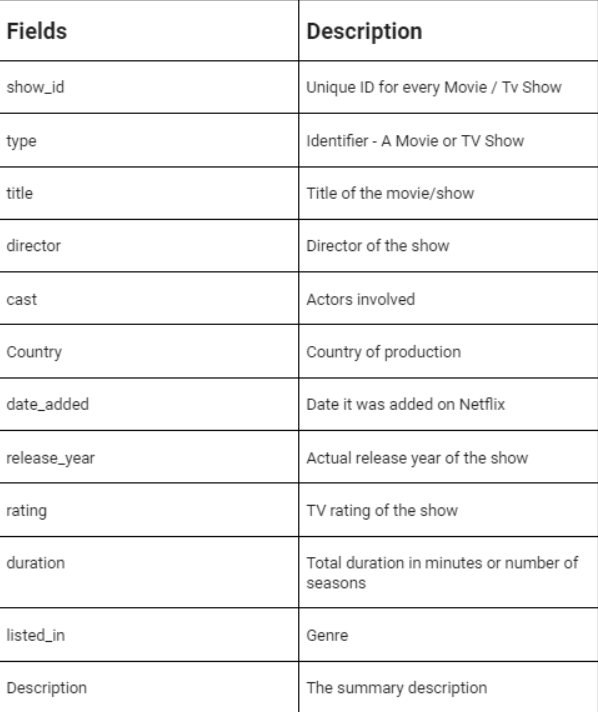

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

In [ ]:
# Dataset Describe
df.describe(include='all')

In [ ]:
df.dtypes

### Variables Description




*   11 variables have data types as object
*   Only 1 vaiable which Is 'release_year' has data type as integer.



### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
df.nunique()

In [ ]:
df.nunique().sum()

In [ ]:
for i in df.columns:
  print(f"No. of unique values in {i} is {df[i].nunique()}")

## ***3.Exploratory Data Analysis***

# Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

# **Uni-Variate Analysis:**

#### Chart - 1 Type

In [ ]:
# Chart - 1 visualization code
df['type'].value_counts()

In [ ]:
sns.countplot(data=df, x='type')
plt.title('Count of Movies and TV Shows')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

##### 1. Why did you pick the specific chart?

As we needed to compare the total number of TV Shows & Movies listed on Netflix count plot is the best chart.

##### 2. What is/are the insight(s) found from the chart?

Netflix has 5377 movies and 2400 TV shows, there are more number movies on Netflix than TV shows

#### Chart - 2 Ratings

In [ ]:
# Chart - 2 visualization code
df['rating'].value_counts()

In [ ]:
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings)
df['target_ages'].head()

In [ ]:
df['target_ages'].value_counts()

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(x='target_ages', data = df)
plt.show()

##### 1. Why did you pick the specific chart?

Here we needed to compare TV Shows & Movies for kids and adults or based on the age group.

For that purpose countplot is more feasible.

##### 2. What is/are the insight(s) found from the chart?

**Around 50% of shows on Netflix are produced for adult audience. Followed by Teens, older kids and kids. Netflix has the least number of shows that are specifically produced for kids than other age groups.**

#### Chart - 3 Typecasting 'date_added' to datetime:

In [ ]:
# Chart - 3 visualization code
df["date_added"].head()

In [ ]:
df["date_added"] = pd.to_datetime(df['date_added'])
df["date_added"].head()

In [ ]:
df.date_added.min(),df.date_added.max()

In [ ]:
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year
df.drop('date_added', axis=1, inplace=True)
df.head()

In [ ]:
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'])
plt.title('distribution by released year')

In [ ]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'month_added' , data = df)
plt.title('Shows/Movies added each month over the years')
plt.xlabel('Months')

##### 1. Why did you pick the specific chart?



*   Histograms provide a visual summary of the distribution of data values. They show the frequency or count of data points within different intervals or bins, allowing you to quickly grasp the central tendency, spread, and shape of the data.Thats why I have used 'histplot'
*   I have used countplot in order to compare the amount of TV Shows / Movies added by Netflix in each month.



##### 2. What is/are the insight(s) found from the chart?



*   The shows were added on Netflix between 1st January 2008 and 16th January 2021.
*   Netflix has greater number of new movies / TV shows than the old ones.

*   Over the years a greater number of shows were added in the months of October, November, December, and January.
*   Netflix continuous to add more shows/movies on its platform over the years.

*   There is a decrease in the number of shows/movies added in the year 2020, which might be attributed to the covid-19-induced lockdowns, which halted the creation of shows.
*   We have Netflix data only up to 16th January 2021, hence there are less movies added in this year.







#### Chart - 4 Director

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 directors by number of shows directed')

##### 1. Why did you pick the specific chart?



*   A horizontal bar graph, often referred to as a horizontal bar plot or a barh graph, is a type of chart where categorical data is represented by horizontal bars.
*   Horizontal bar graphs make it easy to compare the values of different categories side by side in this case the 'director'.



##### 2. What is/are the insight(s) found from the chart?

Raúl Campos & Jan Suter have directed the most amount of TV Shows & Movies which are uploaded by netflix and are the highest than everyone in the dataset.

#### Chart - 5 Country & Listed In

In [ ]:
# Chart - 5 visualization code
df['country'].value_counts()

In [ ]:
df['listed_in'].value_counts()

In [ ]:
df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [ ]:
df['country'].value_counts()

In [ ]:
df['listed_in'].value_counts()

In [ ]:
plt.figure(figsize=(10,5))
df[~(df['country']=='Unknown')].country.value_counts().nlargest(10).plot(kind='barh')
plt.title(' Top 10 countries with the highest number of shows')

In [ ]:
plt.figure(figsize=(10,5))
df.listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres')

##### 1. Why did you pick the specific chart?




*   A horizontal bar graph, often referred to as a horizontal bar plot or a barh graph, is a type of chart where categorical data is represented by horizontal bars.
*   Horizontal bar graphs make it easy to compare the values of different categories side by side in this case ' Top 10 countries with the highest number of shows' & 'Top 10 generes'




##### 2. What is/are the insight(s) found from the chart?



*   There are some movies / TV shows that were filmed in multiple countries, have multiple genres associated with it.
*   The highest number of movies / TV shows were based out of the US, followed by India and UK.

*   The dramas is the most popular genre followed by comedies and documentries.
*   The majority of the shows on Netflix are catered to the needs of adult and teens population.





# **Bivariate Analysis :**

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
print(f"number of director who directed movie : {df[df['type']=='Movie'][~(df['director']=='Unknown')].value_counts().sum()}")
print(f"number of director who directed TV Show :{df[df['type']=='TV Show'][~(df['director']=='Unknown')].value_counts().sum()}")

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(10,5))

# top 10 director who directed TV show
show =df[df['type']=='TV Show'][~(df['director']=='Unknown')].director.value_counts()[:10].plot(kind='barh', ax=ax[0])
show.set_title('top 10 director who directed TV Show', size=10)


# top 10 director who directed movie
movie =df[df['type']=='Movie'][~(df['director']=='Unknown')].director.value_counts()[:10].plot(kind='barh', ax=ax[1])
movie.set_title('top 10 director who directed Movie', size=10)

plt.tight_layout()
plt.show()

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(15,5))

# top 10 TV shows actor
TV_shows = df[df['type']=='TV Show'][~(df['cast']=='Unknown')].cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()[:10].plot(kind='barh', ax=ax[0])
TV_shows.set_title('Top 10 actors who appeared in Tv shows', size=15)

# top 10 Movie actor
movies = df[df['type']=='Movie'][~(df['cast']=='Unknown')].cast.str.split(', ', expand=True).stack().reset_index(level=1, drop=True).value_counts()[:10].plot(kind='barh', ax=ax[1])
movies.set_title('Top 10 actors who appeared in movie', size=15)

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?



*   Horizontal bar graphs make it easy to compare the values of different categories side by side as we saw in above visualisations.



##### 2. What is/are the insight(s) found from the chart?



*   Alastair Fothergill has directed three TV shows, the most of any director.  
*   Raul Campos and Jan Suter have togather directed in 18 movies, higher than everyone. This is followed by Marcus Roboy, Jay Karas, and Cathy Gracia-Molina.
*   Takahiro Sakurai, Yuki Kaji and Daisuke Ono played highest role in the TV shows.
*   Anupam Kher, Shahrukh Khan and Om Puri played highest number of role in the movies.



#### Chart - 7 Duration

In [ ]:
# Chart - 7 visualization code
plt.figure(figsize=(10,7))
sns.distplot(df[df['type']=='Movie']['duration'].str.extract('(\d+)'),kde=False, color=['blue'])
plt.title('Distplot with Normal distribution for Movies',fontweight="bold")
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
tv_show_durations = df[df['type'] == 'TV Show']['duration']
ordered_durations = tv_show_durations.value_counts().index

sns.countplot(data=df[df['type'] == 'TV Show'], x='duration', order=ordered_durations)
plt.title('Count of TV Show Durations',fontweight="bold")
plt.show()

##### 1. Why did you pick the specific chart?



*   As we needed to compare the total time duration of TV Shows & Movies listed on Netflix count plot or dist plot is the best chart.

##### 2. What is/are the insight(s) found from the chart?



*   Most of the movies have duration of minutes between 50 min to 150 min
*   There are highest number of tv_shows consisting of single season



#### Chart - 8 Description

In [ ]:
# Chart - 8 visualization code
from wordcloud import WordCloud, STOPWORDS
text = " ".join(word for word in df['description'])

In [ ]:
wordcloud = WordCloud(stopwords=STOPWORDS).generate(text)

In [ ]:
plt.imshow(wordcloud,  interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?


*   This code snippet is specifically used to display a word cloud generated from text data using Matplotlib, with the axis turned off for a cleaner visualization.
*   The 'bilinear' interpolation method is chosen to ensure smooth rendering of the word cloud image.

##### 2. What is/are the insight(s) found from the chart?

Most of the comman words present in description column are family, find, life, love, new, take, world, friend, live.

#### Chart - 9 No. of Movies and TV Shows added

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(10,5))
p = sns.countplot(x='year_added',data=df, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
order = range(2008,2022)
plt.figure(figsize=(10,5))
p = sns.countplot(x='release_year',data=df, hue='type', order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('')
for i in p.patches:
  p.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

##### 1. Why did you pick the specific chart?

We have used countplot in order to compare number of movies and TV shows added over the years and number of shows released each year since 2008 that are on netflix side by side.

##### 2. What is/are the insight(s) found from the chart?


*   Over the years, Netflix has consistently focused on adding more shows in its platform.


*   Though there was a decrease in the number of movies added in 2020, this pattern did not exist in the number of TV shows added in the same year.
*   This might signal that Netflix is increasingly concentrating on introducing more TV series to its platform rather than movies.

#### Chart - 10 Average movie length over the years

In [ ]:
# Chart - 10 visualization code
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [ ]:
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='line')
plt.title('Average movie length over the years')
plt.ylabel('Length of movie in minutes')
plt.xlabel('Year')

##### 1. Why did you pick the specific chart?

 A line plot is used to visualize the average length of movies over the years as per the dataset.

##### 2. What is/are the insight(s) found from the chart?



*   Netflix has several movies on its site including those that were released in way back 1942.

*   Movies made in the 1940s had a fairly short duration on average.
*   On an average movies made in the 1960s have the longest movie length.


*   The average length of a movie has been gradually decreasing since the 2000s.



#### Chart - 11

In [ ]:
# Chart - 11 visualization code
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']


df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['target_ages'],normalize = "index").T
df_heatmap

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain',
       'Mexico']

age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(df_heatmap.loc[age_order,country_order2],cmap="YlGnBu",square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

##### 1. Why did you pick the specific chart?

 A heatmap is used to visualize the relationship between two categorical variables: age group('target_ages') and country.

##### 2. What is/are the insight(s) found from the chart?



*   The US and UK are closely aligned with their Netflix target ages, but radically different from, example, India or Japan!


*   Also, Mexico and Spain have similar content on Netflix for different age groups.



#### Chart - 12 Showing percentage of originals and others in movies

In [ ]:
# Chart - 12 visualization code
df['originals'] = np.where(df['release_year'] == df['year_added'], 'Yes', 'No')
fig, ax = plt.subplots(figsize=(5,5),facecolor="#363336")
ax.patch.set_facecolor('#363336')
explode = (0, 0.1)
ax.pie(df['originals'].value_counts(), explode=explode, autopct='%.3f%%', labels= ['Others', 'Originals'],
       shadow=True, startangle=90,textprops={'color':"black", 'fontsize': 20}, colors =['red','#F5E9F5'])

##### 1. Why did you pick the specific chart?


A pie chart is used in this case to visualize the proportion of "Originals" compared to other content categories in the dataset.

##### 2. What is/are the insight(s) found from the chart?



*   36% movies are released on Netflix. 64% movies added on Netflix were released earlier by different mode and added to netflix later.
*   Some movies and TV shows were actually released in the past and they were added later on Netflix. But some movies and TV shows were released on Netflix itself. Named as Netflix Originals.


#### Chart - 13 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
correlation = df.corr()

In [ ]:
plt.figure(figsize=(10, 5))
sns.heatmap(correlation, annot=True,cmap="YlGnBu",square=True, linewidth=2.5, cbar=False)
plt.title('Correlation Heatmap')
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap is used in this case to visualize the correlation matrix.

##### 2. What is/are the insight(s) found from the chart?

#### Chart - 14 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(df)
plt.show()

## ***4. Hypothesis Testing***

### Based on your chart experiments, define  hypothetical statements from the dataset. In the next questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0:movies rated for kids and older kids are at least two hours long.

H1:movies rated for kids and older kids are not at least two hours long.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
movies = df[df['type']== 'Movie']

In [ ]:
group_by_= df[['duration','type']].groupby(by='type')
group=group_by_.mean().reset_index()
group

In [ ]:
A= group_by_.get_group('Movie')
B= group_by_.get_group('TV Show')

M1 = A.mean()
S1 = A.std()

M2= B.mean()
S2 = B.std()

print('Mean  {}'.format(M1,M2))
print('Std  {}'.format(S2,S1))

In [ ]:
from scipy import stats
#length of groups and DOF
n1 = len(A)
n2= len(B)
print(n1,n2)

dof = n1+n2-2
print('dof',dof)

sp_2 = ((n2-1)*S1**2  + (n1-1)*S2**2) / dof
print('SP_2 =',sp_2)

sp = np.sqrt(sp_2)
print('SP',sp)

#tvalue
t_val = (M1-M2)/(sp * np.sqrt(1/n1 + 1/n2))
print('tvalue',t_val[0])

In [ ]:
stats.t.ppf(0.025,dof)

In [ ]:
stats.t.ppf(0.975,dof)

As we can see the t-value is not the the range; Therefore the null hypothesis is rejected.

As a result, the duration which has more than 90 mins are Movies.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# We already have handeled missing values.

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# There are no such outliers present in the given data.

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Creating final_text column using all text column which one is used for model building purpose.

In [ ]:
df['final_text'] = df['description'] + ' ' + df['listed_in'] +' ' + df['rating'] + ' ' + df['cast'] + ' ' + df['country'] + ' ' + df['director']
df['final_text']

In [ ]:
df.final_text[0]

In [ ]:
df.dtypes

In [ ]:
import string,unicodedata
string.punctuation
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

#### 2. Removing Punctuations

In [ ]:
# Remove Punctuations
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

In [ ]:
df['final_text'] = df['final_text'].apply(remove_punctuation)

In [ ]:
df['final_text'][0]

#### 3. Removing Stopwords & Lower Case

In [ ]:
stop_words = stopwords.words('english')

# displaying stopwords
print(stop_words)

In [ ]:
def stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

In [ ]:
df['final_text']=df['final_text'].apply(stopwords)

In [ ]:
df['final_text'][0]

#### 4. Lemmatization

In [ ]:
# Lemmatization
import nltk
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

In [ ]:
def lemmatize_verbs(words):
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [ ]:
df['final_text'] = lemmatize_verbs(df['final_text'])

#### 5. Tokenization

In [ ]:
# Tokenization
from nltk.tokenize import TweetTokenizer
tokenizer = TweetTokenizer()

df['final_text'] = df['final_text'].apply(lambda x: tokenizer.tokenize(x))

#### 6. Removing non-ASCII characters

In [ ]:
# POS Taging
def remove_non_ascii(words):
    new_words = []
    for word in words:
      new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
      new_words.append(new_word)
    return new_words

In [ ]:
df['final_text']= df['final_text'].apply(remove_non_ascii)

In [ ]:
df['final_text'][0]

#### 7. Text Vectorization

In [ ]:
# Vectorizing Text
final_data = df['final_text']
final_data

In [ ]:
def identity_tokenizer(text):
    return text

tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 10000)
tfidf_matrix = tfidf.fit_transform(final_data)

array = tfidf_matrix.toarray()

In [ ]:
print(array)
print(f'shape of the vector : {array.shape}')
print(f'datatype : {type(array)}')

##### Which text vectorization technique have you used and why?



*   We will vectorized the corpus using TFIDF vectorizer, where TFIDF stands for Term Frequency Inverse Document Frequency.

 TFIDF=TF*IDF
*   Text Vectorization is the process of converting text into numerical representation



### 5. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
#DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 6. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

## ***6. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***